In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns; sns.set()
sns.set(style='white')

In [2]:
# data loading 

# open files : https://stackoverflow.com/a/18262324/9600186
with open('data/guzey_arena_0-control.csv', 'r') as f: # open in readonly mode
    sample_control_temp = pd.read_csv(f)
    
with open('data/guzey_arena_0-treatment.csv', 'r') as f: # open in readonly mode
    sample_treatment_temp = pd.read_csv(f)
        
# remove everything except for time elapsed from the data
sample_control_temp = sample_control_temp['time_elapsed']
sample_treatment_temp = sample_treatment_temp['time_elapsed']

In [3]:
# separate control and treatment into days
sample_control = []
sample_treatment = []

# per protocol
sessions_per_day = 33

sample_control.append(sample_control_temp[0:sessions_per_day])
sample_control.append(sample_control_temp[sessions_per_day:2*sessions_per_day])
sample_control.append(sample_control_temp[2*sessions_per_day:3*sessions_per_day])
sample_treatment.append(sample_treatment_temp[0:sessions_per_day])
sample_treatment.append(sample_treatment_temp[sessions_per_day:2*sessions_per_day])
sample_treatment.append(sample_treatment_temp[2*sessions_per_day:3*sessions_per_day])

In [4]:
# packing lapses into dataframes by creating one row per session
# first np.full in every line fills sessions_per_day number of rows with the day on which sessions took place)
# second np.full in every line fills sessions_per_day number of rows with 
sample_control[0] = pd.DataFrame(list(zip(np.full(sessions_per_day,1), 
                                          sample_control[0])),
                                 columns=['day','time_elapsed'])
sample_control[1] = pd.DataFrame(list(zip(np.full(sessions_per_day,19),
                                          sample_control[1])),
                                 columns=['day','time_elapsed'])
sample_control[2] = pd.DataFrame(list(zip(np.full(sessions_per_day,20),
                                          sample_control[2])),
                                 columns=['day','time_elapsed'])
sample_treatment[0] = pd.DataFrame(list(zip(np.full(sessions_per_day,13),
                                          sample_treatment[0])),
                                 columns=['day','time_elapsed'])
sample_treatment[1] = pd.DataFrame(list(zip(np.full(sessions_per_day,14),
                                          sample_treatment[1])),
                                 columns=['day','time_elapsed'])
sample_treatment[2] = pd.DataFrame(list(zip(np.full(sessions_per_day,15),
                                          sample_treatment[2])),
                                 columns=['day','time_elapsed'])

dataset constructed in accordance with: https://gist.github.com/guzey/5980c78a992517bae18ffe16e668f6b5

In [5]:
# creating arrays of days to be packed into the dataframe with time_elapsed
days = np.arange(-7,22)
# https://stackoverflow.com/a/10996196/9600186
days = np.delete(days, 7)
days_of_sleep_deprivation = [1,2,3,
                             4,5,6,
                             7,8,1,
                             2,3,4,
                             5,6,7,
                             8,9,10,
                             11,12,13,
                             14,1,2,
                             3,1,2]

In [6]:
# setting lapses to 100 so matplotlib shows every day on the plot, 100 lapses are never shown on the plot
time_elapsed = np.full(27, 120)
# lapses = sample_control[0]

In [7]:
# merging days, hours of sleep and time_elapsed into one dataframe
# https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
df = pd.DataFrame(list(zip(days,time_elapsed)), columns=['day','time_elapsed'])
# remove fake 100s from the days where I have real data (or they wil will thought of as real data when drawing graphs!)
df = df.drop(df.index[[7,19,20,21,25,26]])

In [8]:
# appending real time_elapsed that will be shown on the graph to the dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html
df = df.append(sample_control[0], ignore_index=True)
df = df.append(sample_control[1], ignore_index=True)
df = df.append(sample_control[2], ignore_index=True)
df = df.append(sample_treatment[0], ignore_index=True)
df = df.append(sample_treatment[1], ignore_index=True)
df = df.append(sample_treatment[2], ignore_index=True)

In [9]:
# based on https://stackoverflow.com/a/53383764/9600186
def draw_brace(ax, xspan, yy, text):
    '''Draws an annotated brace on the axes.'''
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin
    
    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy - (.05*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
# https://stackoverflow.com/questions/9912206/how-do-i-let-my-matplotlib-plot-go-beyond-the-axes
    ax.plot(x, y, color='black', lw=1, clip_on=False)

    ax.text((xmax+xmin)/2., yy-.13*yspan, text, ha='center', va='bottom', fontsize=20)

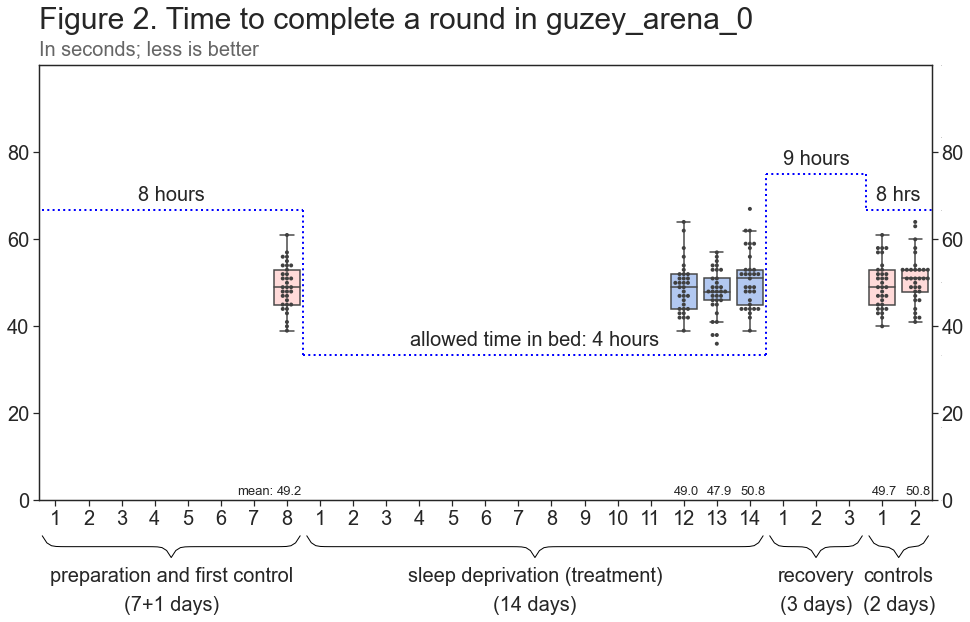

In [10]:
# parameters
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib#comment47852929_332289
plt.figure(figsize=(16,8))
# https://stackoverflow.com/a/53086342/9600186
plt.tick_params(labelsize=20)

# drawing boxplots and swarplots which show all datapoints
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
# hide outliers: https://www.mikulskibartosz.name/how-to-remove-outliers-from-seaborn-boxplot-charts/
ax = sns.boxplot(x='day', y='time_elapsed', data=df, showfliers=False)
ax = sns.swarmplot(x='day', y='time_elapsed', data=df, color='0.25', size=4)
ax.set(ylim=(0, 99.99), ylabel='', xlim=(-0.5,26.5), xlabel='')
# https://stackoverflow.com/a/45731070/9600186
ax.set_xticklabels(days_of_sleep_deprivation, fontsize=20)

# coloring boxcharts https://www.pinterest.ru/pin/131378514108343305/
for i in [7,25,26]:
    ax.artists[i].set_facecolor('#ffdad9')
    
for i in [19,20,21]:
    ax.artists[i].set_facecolor('#b2c8f1')

# setting the right axis
# https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
ax2 = plt.twinx()
ax2.set(ylim=(0, 12), ylabel='')

# setting font sizes that didn't get set in by tick_params
# https://stackoverflow.com/a/12892526/9600186
for label in ax2.yaxis.get_majorticklabels():
        label.set_fontsize(0)
# https://stackoverflow.com/a/10404895/9600186
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
# ax2.yaxis.label.set_size(20)
ax2.tick_params(right=False)

# https://brohrer.github.io/matplotlib_ticks.html#opposite
# https://stackoverflow.com/a/12651723/9600186
ax.tick_params(bottom=True, right=True, labelright=True)

plt.text(5.5, .15, 'mean:', fontsize=13)
plt.text(6.7, .15, str(np.round(np.mean(sample_control[0])['time_elapsed'], 1)), fontsize=13)
plt.text(18.7, .15, str(np.round(np.mean(sample_treatment[0])['time_elapsed'], 1)), fontsize=13)
plt.text(19.7, .15, str(np.round(np.mean(sample_treatment[1])['time_elapsed'], 1)), fontsize=13)
plt.text(20.7, .15, str(np.round(np.mean(sample_treatment[2])['time_elapsed'], 1)), fontsize=13)
plt.text(24.7, .15, str(np.round(np.mean(sample_control[1])['time_elapsed'], 1)), fontsize=13)
plt.text(25.7, .15, str(np.round(np.mean(sample_control[2])['time_elapsed'], 1)), fontsize=13)

# drawing hours of sleep and braces here because hours of sleep axis will be the same across experiments, so coordinates of
# everything stay the same
# drawing the hours of sleep line
# dashed: https://www.science-emergence.com/Articles/How-to-plot-a-dashed-line-in-matplotlib-/
# zorder: https://www.science-emergence.com/Articles/How-to-plot-points-in-front-of-a-line-in-matplotlib-/
# and https://stackoverflow.com/questions/31506361/grid-zorder-seems-not-to-take-effect-matplotlib#comment96363710_53584883
# line: https://stackoverflow.com/a/36148001/9600186
# color: https://stackoverflow.com/questions/41709257/how-to-change-the-plot-line-color-from-blue-to-black
plt.plot([-0.4, 7.5], [8, 8], ':', linewidth=2, color='blue', zorder=-1)
plt.plot([7.5, 7.5], [8, 4], ':', linewidth=2, color='blue', zorder=-1)
plt.plot([7.5, 21.5], [4, 4], ':', linewidth=2, color='blue', zorder=-1)
plt.plot([21.5, 21.5], [4, 9], ':', linewidth=2, color='blue', zorder=-1)
plt.plot([21.5, 24.5], [9, 9], ':', linewidth=2, color='blue', zorder=-1)
plt.plot([24.5, 24.5], [9, 8], ':', linewidth=2, color='blue', zorder=-1)
plt.plot([24.5, 27], [8, 8], ':', linewidth=2, color='blue', zorder=-1)

# line legend
# plt.plot([20, 21.1], [15, 15], ':', linewidth=2, color='blue', zorder=-1)
# plt.text(21.5, 14.8, 'sleep opportunity', fontsize=20)

# writing text by drawing invisible braces...
draw_brace(ax2, (3.5, 3.5), 9.7, '8 hours')
draw_brace(ax2, (14.5, 14.5), 5.7, 'allowed time in bed: 4 hours')
draw_brace(ax2, (23, 23), 10.7, '9 hours')
draw_brace(ax2, (25.5, 25.5), 9.7, '8 hrs')

draw_brace(ax2, (-0.4, 7.4), -0.8, 'preparation and first control')
draw_brace(ax2, (3.5, 3.5), -1.6, '(7+1 days)')
draw_brace(ax2, (7.6, 21.4), -0.8, 'sleep deprivation (treatment)')
draw_brace(ax2, (14.5, 14.5), -1.6, '(14 days)')
draw_brace(ax2, (21.6, 24.4), -0.8, 'recovery')
draw_brace(ax2, (23, 23), -1.6, '(3 days)')
draw_brace(ax2, (24.6, 26.4), -0.8, 'controls')
draw_brace(ax2, (25.5, 25.5), -1.6, '(2 days)')

plt.text(-0.5, 13, 'Figure 2. Time to complete a round in guzey_arena_0', fontsize=30)
plt.text(-0.5, 12.3, 'In seconds; less is better', fontsize=20, color='0.4')

# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# https://stackoverflow.com/a/59305136/9600186
plt.savefig('guzey_arena_0.png',
            format='png',
            dpi=100,
            bbox_inches='tight')